In [1]:
%pylab inline
from utils import *
from data import *
from scoring import *

Populating the interactive namespace from numpy and matplotlib


# Some general notes

* The data has been perpared by running add_measures.py, which adds avg and stddev of speed and course for various sizes of a rolling window (from 30min to 24h).

* We use a simple logistical regression with polynomial features and a small regularization (lambda = 0.0001) to get around numerical rounding problems

* We determine, for each gear type, what the optimal window size is by running the regression for each window size and a fixed polynomial degree.

* We determine, for each gear type, what the optimal degree of the polynomial is by running the regression for each degree of polynomial with a fixed window size.

* We can't easily automatically derive the grade of the polynomial from the regression over polynomial length, since the graph only flattens out, it doesn't have a minima, so it's a judgement call what is "good enough". Therefore the grade parameter has been hard-coded below, after examining the graph for grade vs cross validation error.

# Longliners
## Longliners using Alex' data
Train the algorithm using Alex' data, then evaluate on both Alex' and Kristinas data

Fitting an optimal window size for avg/stddev columns
1800: Fitting... Scoring... Calc.err... train=0.174714583077, cross=0.175246736498
3600: Fitting... Scoring... Calc.err... train=0.174566924929, cross=0.173387508087
10800: Fitting... Scoring... Calc.err... train=0.160958590753, cross=0.156482193066
21600: Fitting... Scoring... Calc.err... train=0.1463384036, cross=0.140171907626
43200: Fitting... Scoring... Calc.err... train=0.134745899411, cross=0.120966019563
86400: Fitting... Scoring... Calc.err... train=0.144606470292, cross=0.125295550443


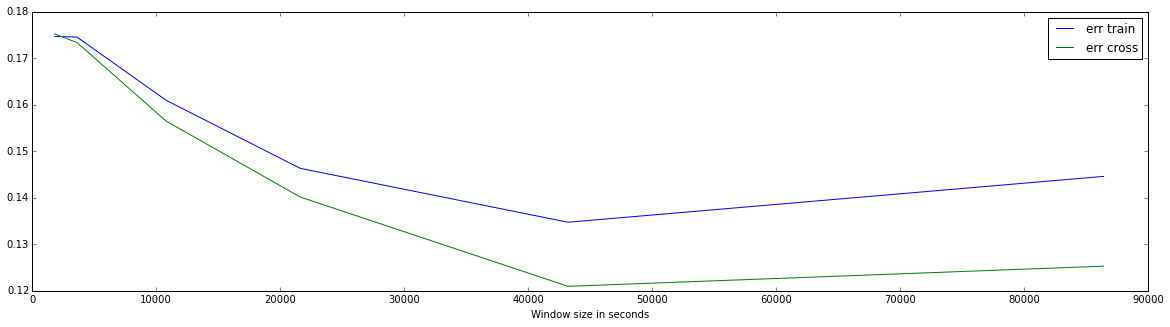

Best window size: 43200
Fitting an optimal degree of polynomial
2: Fitting... Scoring... Calc.err... train=0.159078450327, cross=0.14903651761
3: Fitting... Scoring... Calc.err... train=0.14035148812, cross=0.130194634955
4: Fitting... Scoring... Calc.err... train=0.134745924097, cross=0.120965892932
5: Fitting... Scoring... Calc.err... train=0.134302762614, cross=0.120339362094
6: Fitting... Scoring... Calc.err... train=0.134019759231, cross=0.119685464484
7: Fitting... Scoring... Calc.err... train=0.132593973813, cross=0.116151823789
8: Fitting... Scoring... Calc.err... train=0.132640939501, cross=0.116252688276
9: Fitting... Scoring... Calc.err... train=0.133639566136, cross=0.118269076321


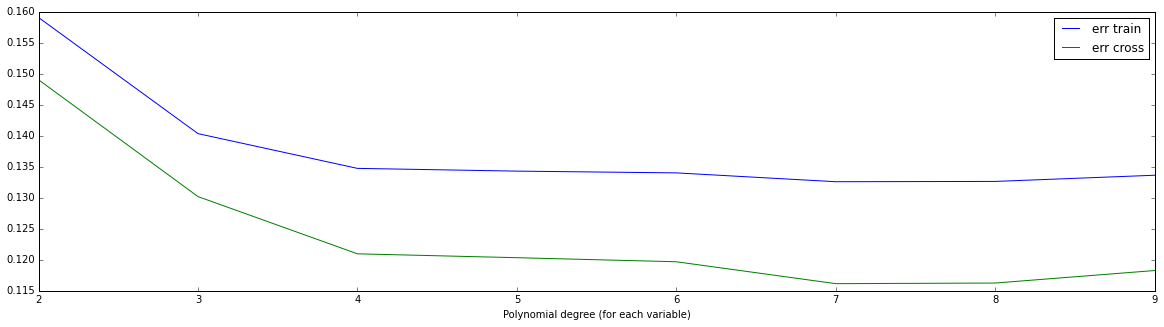

Evaluation using Alex' data:


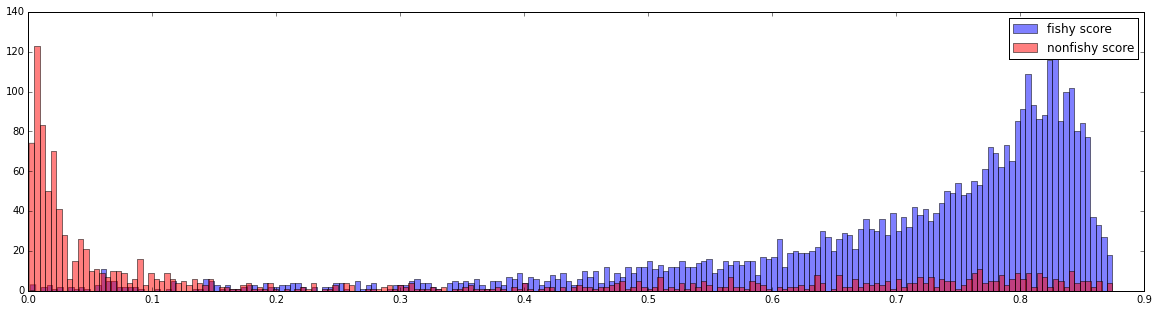

Squared numerical error: 0.117198673149
Error (overlap): 20.44%
False positives given cutoff at 0.5: 17.7979690005%


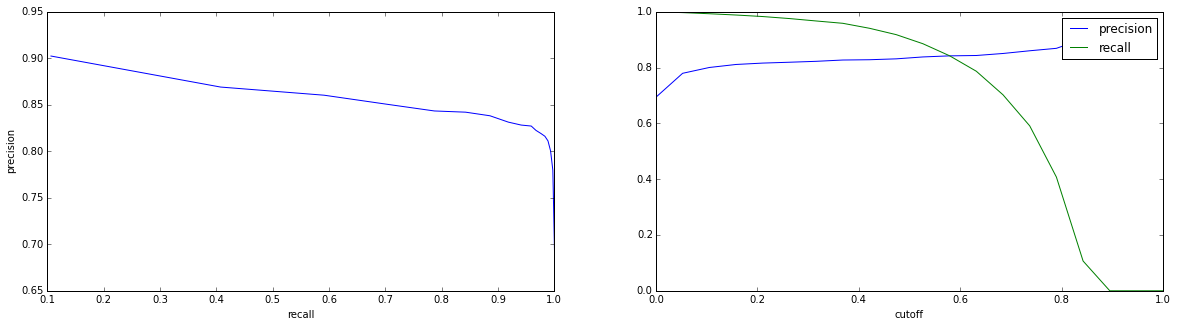

Score window: 43200
Score polynomial: [ -1.59016265 -21.93682155  29.05820301  23.37757842 -37.63135355
  -1.59016265 -25.02251126 -23.18010369  -8.33347429  -1.02131292
  -1.59016265   1.25410408   1.84055703   2.38732136   0.61754115]
Evaluate using Kristinas data:


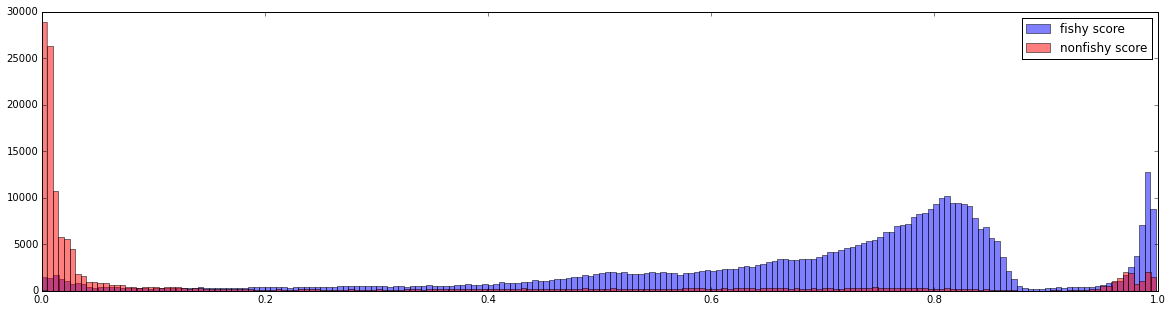

Squared numerical error: 0.142690985636
Error (overlap): 20.3661431702%
False positives given cutoff at 0.5: 15.3157475627%


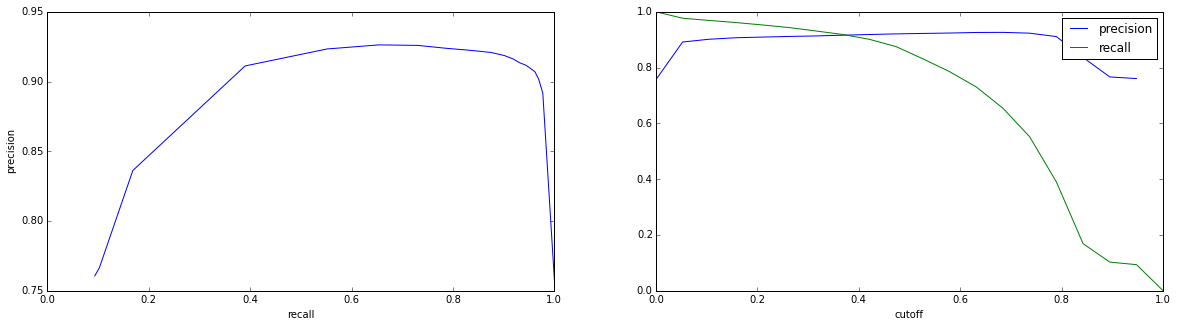

Score window: 43200
Score polynomial: [ -1.59149006 -21.93064264  29.05153467  23.37610512 -37.62781302
  -1.59149006 -25.0300487  -23.18847243  -8.33726098  -1.02190067
  -1.59149006   1.25328024   1.83957811   2.38686211   0.61747384]


In [2]:
x, xtrain, xcross, xtest = load_dataset_by_vessel('classified-filtered.npz')
_x, _xtrain, _xcross, _xtest = load_dataset_by_vessel('datasets/kristina_longliner.measures.npz')
min_window = optimize_window_size(xtrain, xcross)
optimize_polynomial_degree(xtrain, xcross, min_window)
print "Evaluation using Alex' data:"
evaluate_score(xtrain, xtest, 5, min_window)
print "Evaluate using Kristinas data:"
evaluate_score(xtrain, _x, 5, min_window)

# Score all of Kristinas data and save it
train_and_score(xtrain, _x, 5, min_window)
numpy.savez_compressed("datasets/kristina_longliner.alex-scores.npz", x=_x.filled())

# Longliners using Kristinas' data
Train the algorithm using Kristinas data, and evaluate using a separate subset of Kristinas data.

Fitting an optimal window size for avg/stddev columns
1800: Fitting... Scoring... Calc.err... train=0.133934331469, cross=0.193088942532
3600: Fitting... Scoring... Calc.err... train=0.129930196037, cross=0.189171628565
10800: Fitting... Scoring... Calc.err... train=0.112998145431, cross=0.18302908007
21600: Fitting... Scoring... Calc.err... train=0.104971016772, cross=0.175959914277
43200: Fitting... Scoring... Calc.err... train=0.0946493850781, cross=0.138466083572
86400: Fitting... Scoring... Calc.err... train=0.108513388324, cross=0.139786255825


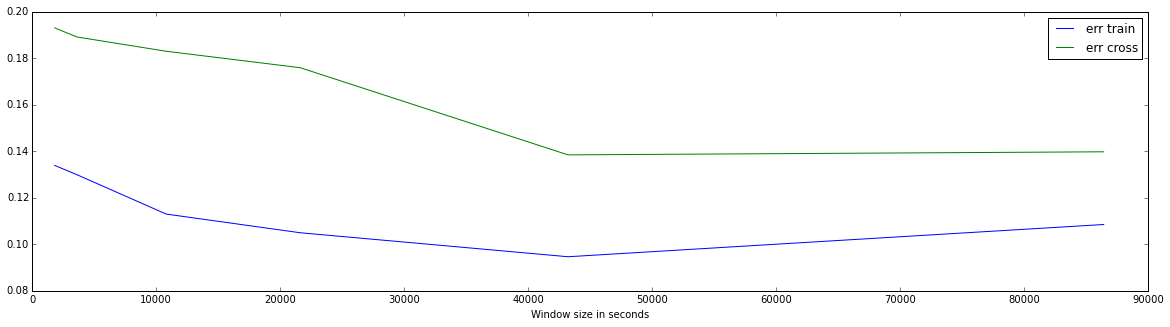

Best window size: 43200
Fitting an optimal degree of polynomial
2: Fitting... Scoring... Calc.err... train=0.117732056335, cross=0.13064146342
3: Fitting... Scoring... Calc.err... train=0.113502302171, cross=0.137741544552
4: Fitting... Scoring... Calc.err... train=0.0946493979904, cross=0.138466291465
5: Fitting... Scoring... Calc.err... train=0.0885078415316, cross=0.143202665284
6: Fitting... Scoring... Calc.err... train=0.0883794022136, cross=0.140818965535
7: Fitting... Scoring... Calc.err... train=0.0885442026963, cross=0.138987582774
8: Fitting... Scoring... Calc.err... train=0.0893674845259, cross=0.14146530467
9: Fitting... Scoring... Calc.err... train=0.230025119936, cross=0.265722532346


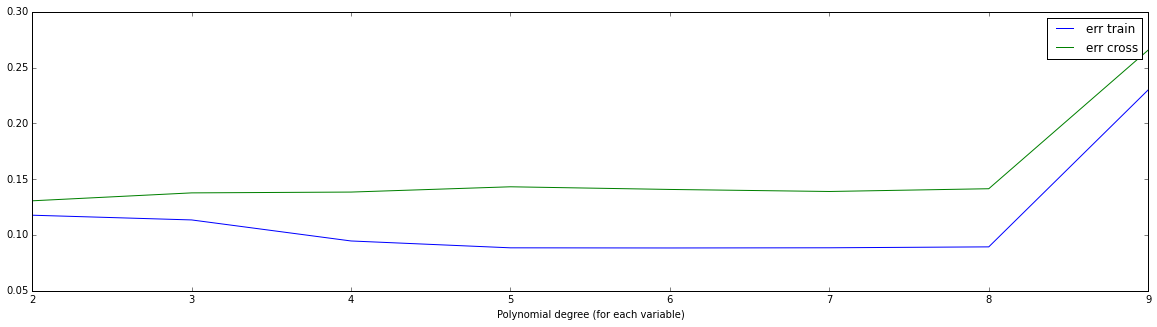

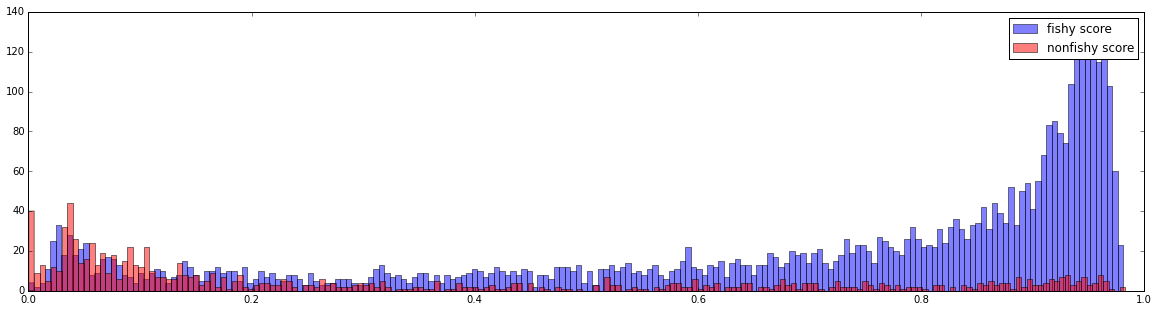

Squared numerical error: 0.179446838799
Error (overlap): 29.48%
False positives given cutoff at 0.5: 15.9555815313%


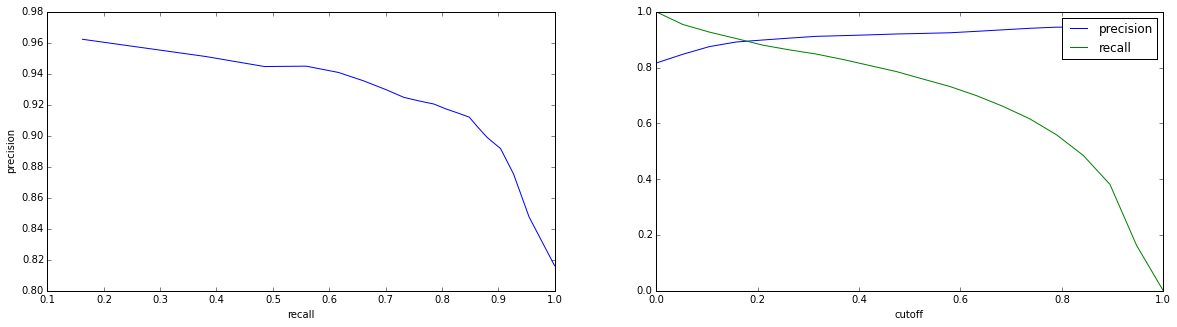

Score window: 43200
Score polynomial: [ -5.37312355e+00   3.73104650e+01  -1.82612339e+02   3.33974580e+02
  -1.91848581e+02  -5.37312347e+00  -4.39333794e+01  -4.41542452e+01
  -1.84511554e+01  -2.68133719e+00  -5.37312343e+00   2.57854928e+00
   1.99280034e-01   5.75320914e-01   2.17345607e-01]


In [3]:
x, xtrain, xcross, xtest = load_dataset_by_vessel('datasets/kristina_longliner.measures.npz')
min_window = optimize_window_size(xtrain, xcross)
optimize_polynomial_degree(xtrain, xcross, min_window)
evaluate_score(xtrain, xtest, 5, min_window)

train_and_score(xtrain, x, 5, min_window)
numpy.savez_compressed("datasets/kristina_longliner.kristina-scores.npz", x=x.filled())

# Diferences between the datasets
How does the two labeled datasets differ in their labeleing? Alex only has labeled data for longliners, so that's what we'll compare:

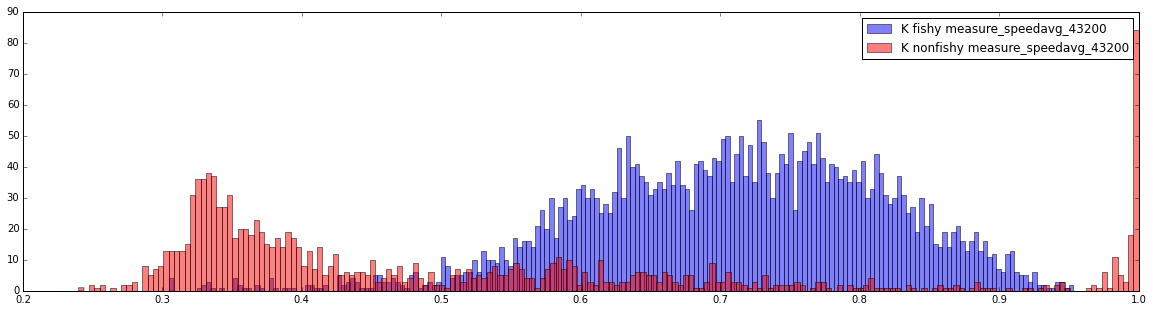

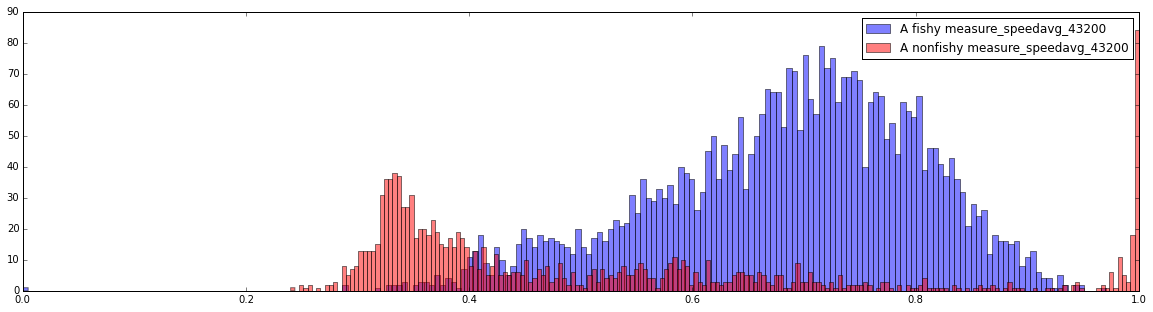

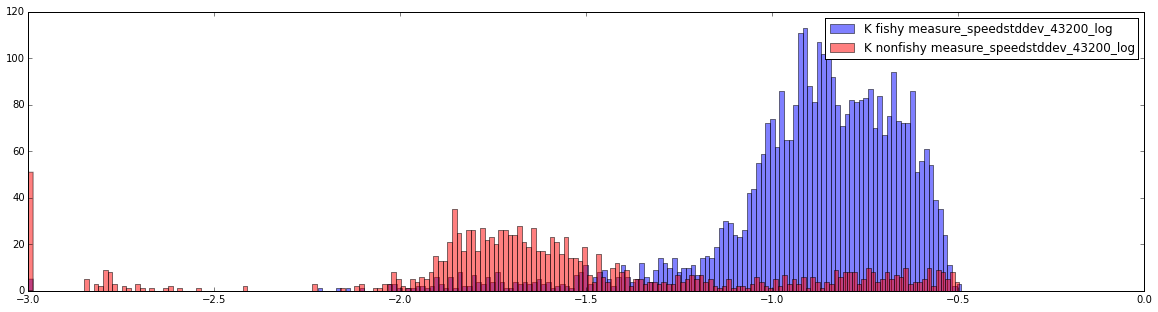

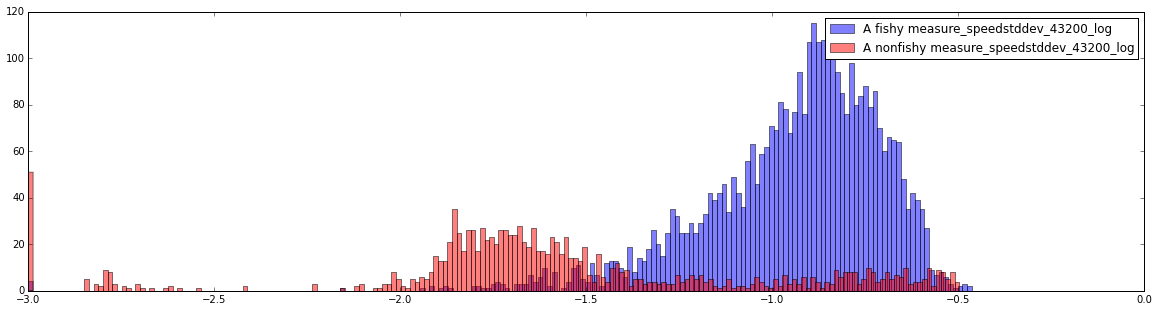

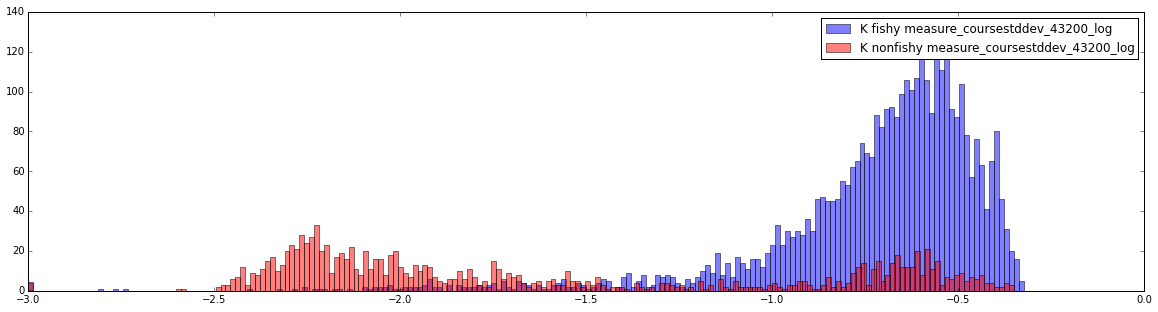

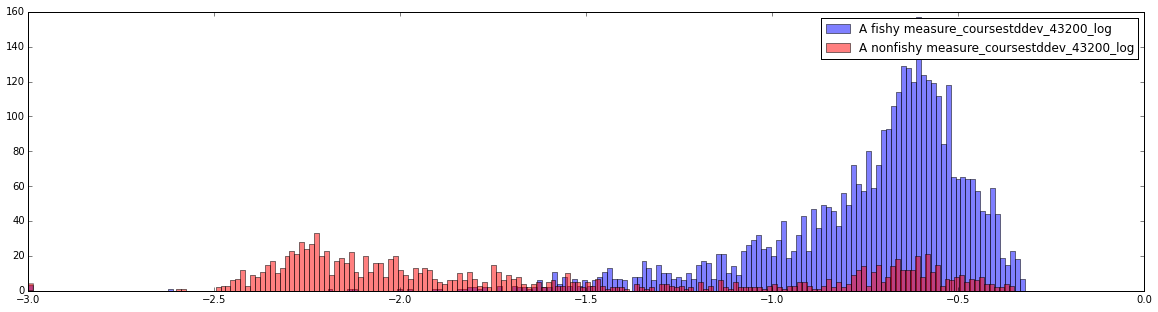

In [4]:
_x, _xtrain, _xcross, _xtest = load_dataset_by_vessel('classified-filtered.npz')
x, xtrain, xcross, xtest = load_dataset_by_vessel('datasets/kristina_longliner.measures.npz')

xfishy = fishy(xtest)
xnonfishy = nonfishy(xtest)
_xfishy = fishy(_xtest)
_xnonfishy = nonfishy(xtest)
window = 43200
for col in ('measure_speedavg_%s' % window,
        'measure_speedstddev_%s_log' % window,
        'measure_coursestddev_%s_log' % window):
    figure(figsize=(20,5))
    hist(xfishy[col], bins=200, normed=False, color='b', alpha=0.5, label="K fishy " + col)
    hist(xnonfishy[col], bins=200, normed=False, color='r', alpha=0.5, label="K nonfishy " + col)
    legend()
    show()

    figure(figsize=(20,5))
    hist(_xfishy[col], bins=200, normed=False, color='b', alpha=0.5, label="A fishy " + col)
    hist(_xnonfishy[col], bins=200, normed=False, color='r', alpha=0.5, label="A nonfishy " + col)
    legend()
    show()

# Trawlers

Fitting an optimal window size for avg/stddev columns
1800: Fitting... Scoring... Calc.err... train=0.146433743317, cross=0.122548340881
3600: Fitting... Scoring... Calc.err... train=0.147300065526, cross=0.120212217482
10800: Fitting... Scoring... Calc.err... train=0.147298843932, cross=0.11233801079
21600: Fitting... Scoring... Calc.err... train=0.148801254135, cross=0.110227051958
43200: Fitting... Scoring... Calc.err... train=0.164268826926, cross=0.119008624321
86400: Fitting... Scoring... Calc.err... train=0.17351281591, cross=0.130186012168


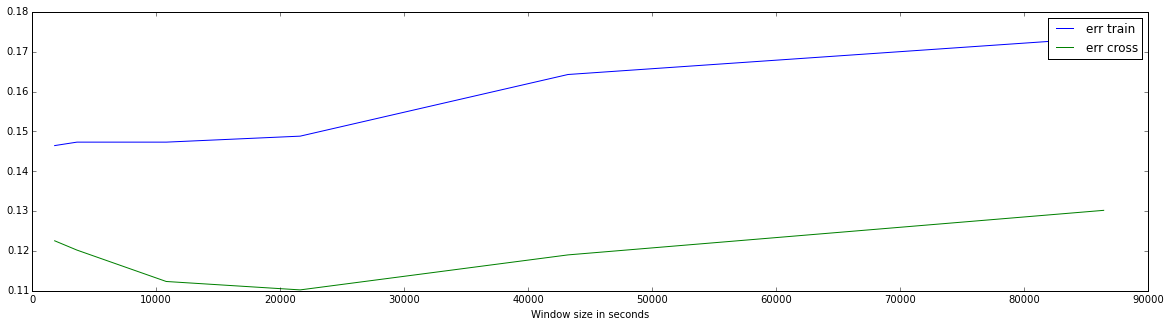

Best window size: 21600
Fitting an optimal degree of polynomial
2: Fitting... Scoring... Calc.err... train=0.191536231092, cross=0.156154409162
3: Fitting... Scoring... Calc.err... train=0.155261188087, cross=0.12515177581
4: Fitting... Scoring... Calc.err... train=0.148801215093, cross=0.110227101294
5: Fitting... Scoring... Calc.err... train=0.147748462925, cross=0.107205933933
6: Fitting... Scoring... Calc.err... train=0.14625700599, cross=0.105503823855
7: Fitting... Scoring... Calc.err... train=0.146627359661, cross=0.105581950241
8: Fitting... Scoring... Calc.err... train=0.145975309432, cross=0.106342762311
9: Fitting... Scoring... Calc.err... train=0.497857774422, cross=0.733642484061


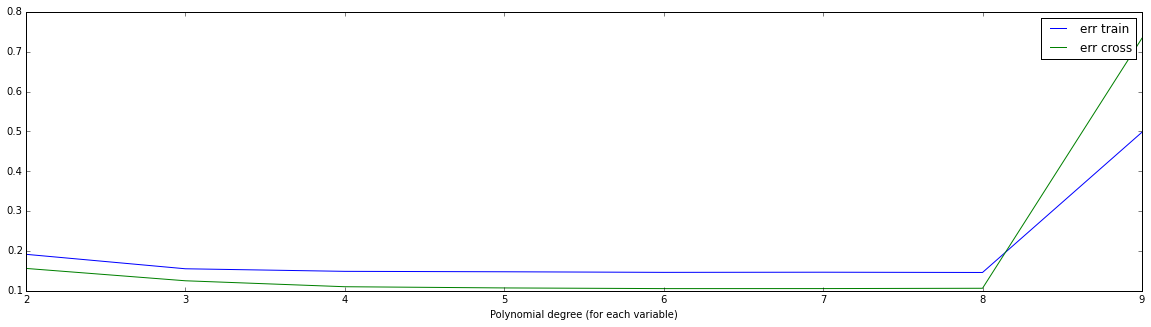

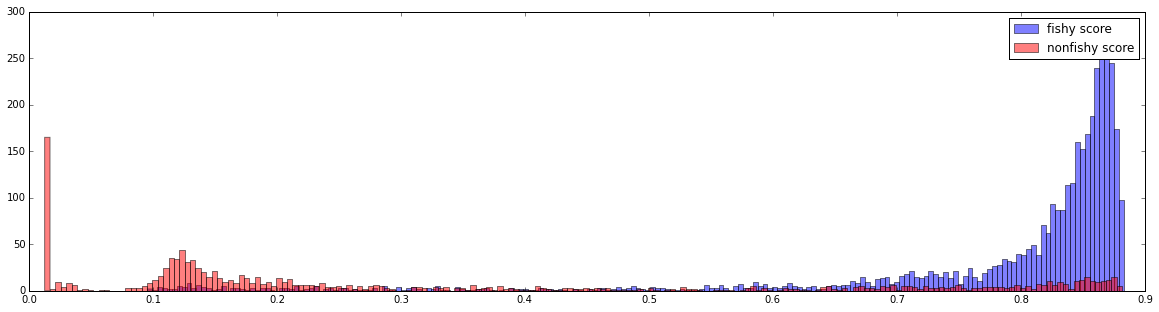

Squared numerical error: 0.0960543994485
Error (overlap): 20.68%
False positives given cutoff at 0.5: 17.4603174603%


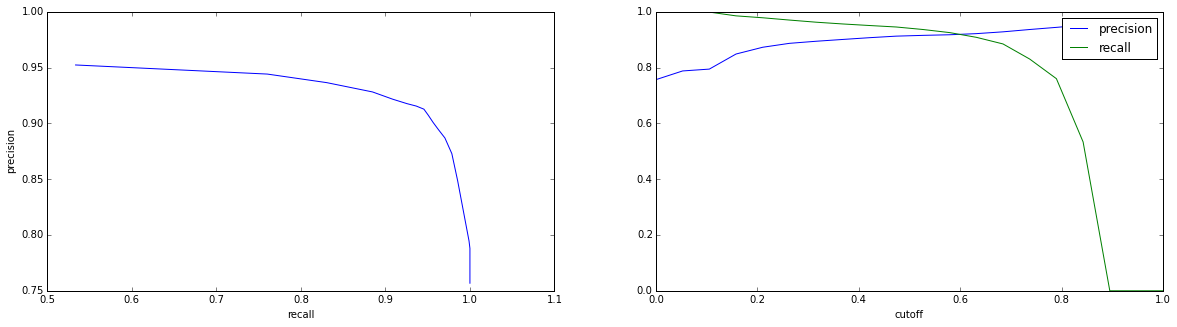

Score window: 21600
Score polynomial: [ -0.36744223 -25.9451526   34.20804374  34.03921212 -48.21955621
  -0.36744223  -3.58684337  -1.33010877   0.15295658   0.09011248
  -0.36744223  -5.8413596   -5.93435663  -2.20165113  -0.27980537]


In [ ]:
x, xtrain, xcross, xtest = load_dataset_by_vessel('datasets/kristina_trawl.measures.npz')
min_window = optimize_window_size(xtrain, xcross)
optimize_polynomial_degree(xtrain, xcross, min_window)
evaluate_score(xtrain, xtest, 5, min_window)

# Score all of Kristinas data and save it
train_and_score(xtrain, x, 5, min_window)
numpy.savez_compressed("datasets/kristina_trawl.scores.npz", x=x.filled())

# Purse seiners

Fitting an optimal window size for avg/stddev columns
1800: Fitting... Scoring... Calc.err... train=0.125890239597, cross=0.259481896546
3600: Fitting... Scoring... Calc.err... train=0.124717390905, cross=0.252662396234
10800: Fitting... Scoring... Calc.err... train=0.133081706683, cross=0.237032207889
21600: Fitting... Scoring... Calc.err... train=0.136652810091, cross=0.23895982723
43200: Fitting... Scoring... Calc.err... train=0.162697553916, cross=0.312787134836
86400: Fitting... Scoring... Calc.err... train=0.182049051231, cross=0.280208309025


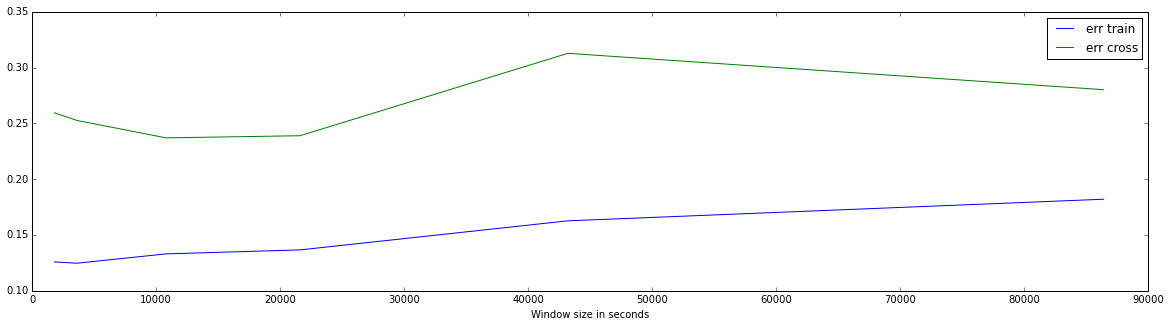

Best window size: 10800
Fitting an optimal degree of polynomial
2: Fitting... Scoring... Calc.err... train=0.134829585698, cross=0.213815199103
3: Fitting... Scoring... Calc.err... train=0.133587620153, cross=0.221344454372
4: Fitting... Scoring... Calc.err... train=0.133081701536, cross=0.237032065846
5: Fitting... Scoring... Calc.err... train=0.132151904623, cross=0.246023414917
6: Fitting... Scoring... Calc.err... train=0.126284820851, cross=0.22448337188
7: Fitting... Scoring... Calc.err... train=0.497398440724, cross=0.945572386718
8: Fitting...

In [ ]:
x, xtrain, xcross, xtest = load_dataset_by_vessel('datasets/kristina_ps.measures.npz')
min_window = optimize_window_size(xtrain, xcross)
optimize_polynomial_degree(xtrain, xcross, min_window)
evaluate_score(xtrain, xtest, 6, min_window)

# Score all of Kristinas data and save it
train_and_score(xtrain, x, 5, min_window)
numpy.savez_compressed("datasets/kristina_ps.scores.npz", x=x.filled())